In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from tqdm import tqdm

import hrv_analysis as hrv
import optical_gating_analysis as OG

import j_py_sad_correlation as jps

In [2]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif")
oog.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence Reference period: 111.03989316840034; Reference indices: [25, 141]


Getting SADs: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

Getting phases


In [3]:
print(oog.sequence_manager.sequence_src)

E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\Allied Vision Technologies GS650 0001f61c\*tif


In [4]:
hr = hrv.get_hr_from_folder(oog.sequence_manager.sequence_src)
print(hr)

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\very_good_sync_proprananol\Allied Vision Technologies GS650 0001f61c\007979.tif
Getting reference sequence Reference period: 111.03989316840034; Reference indices: [25, 141]


Getting SADs: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Getting phases


 14%|█▍        | 1/7 [00:00<00:01,  3.20it/s]

[ 27 138 247 359 468 580 691 801 912]


 29%|██▊       | 2/7 [00:00<00:01,  3.09it/s]

[ 21  39 133 149 242 261 352 372 462 480 573 682 793 903]


 43%|████▎     | 3/7 [00:01<00:01,  2.79it/s]

[ 14 124 235 346 364 457 477 569 588 678 697 788 808 899]


 57%|█████▋    | 4/7 [00:01<00:01,  2.80it/s]

[ 10  27 120 232 252 345 363 456 525 567 679 792 816 905 924]


 71%|███████▏  | 5/7 [00:01<00:00,  2.84it/s]

[ 18 127 155 238 350 418 435 461 572 680 699 790 898 916]


 86%|████████▌ | 6/7 [00:02<00:00,  2.84it/s]

[  8 118 229 342 453 471 563 583 672 689 781 891]
[  2  21 115 136 226 242 294 338 356 448]


100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

[112.0751581928404, 109.66297047554653, 112.93047871060861, 110.09477356283423, 113.33568627450984, 111.65126335424793, 111.1797714334632, 111.44842016001178, 112.84841827768014, 113.25135510771369, 110.03944918373534, 109.76747030048915, 111.21198759569728, 111.3982020095188, 110.76852764768711, 110.83648767605632, 111.46460681013787, 111.66547431013657, 110.4219672373082, 111.83986833984773, 111.18048647667456, 111.37494019547536, 111.87716558387473, 112.14400907896311, 111.45364499305896, 111.58253257864948, 113.05186276468237, 112.89545732639954, 110.55127257610047, 110.38098213170065, 110.19384748077334, 110.63288681809354, 112.38478069402856, 112.25608606879223, 111.45752731601547, 111.47974379503603, 112.95127725170667, 113.69006038489943, 113.40527477146162, 111.95612803911803, 112.03569870583101, 112.23041314086606, 111.78843803471034, 112.89739223508809, 113.69897494305235, 114.70282653293827, 114.93131921507677, 110.2236264884061, 111.80036463081132, 111.41304577650914, 113.

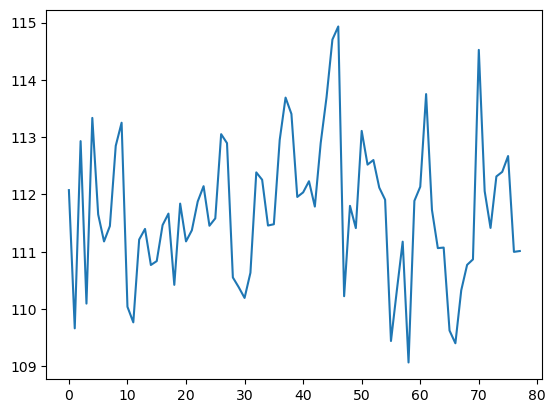

In [11]:
plt.plot(range(len(hr)), hr)

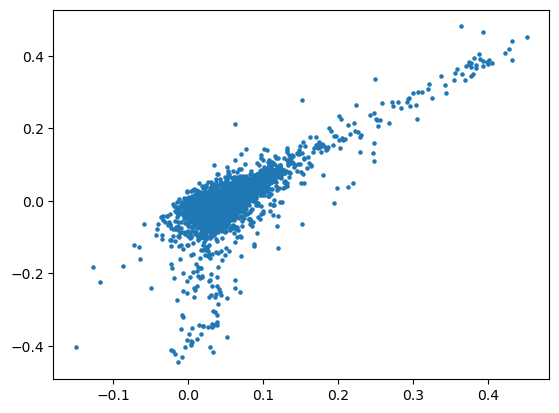

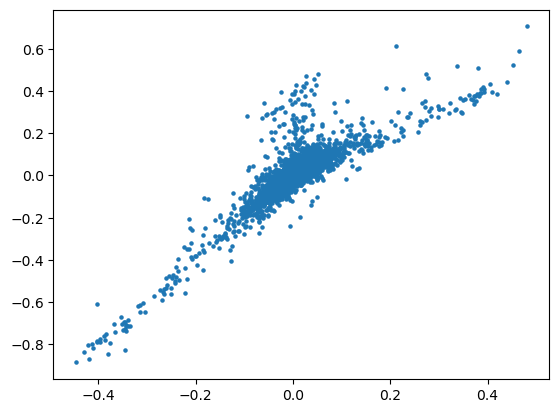

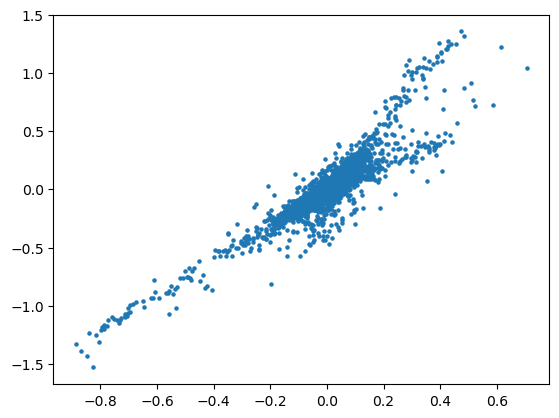

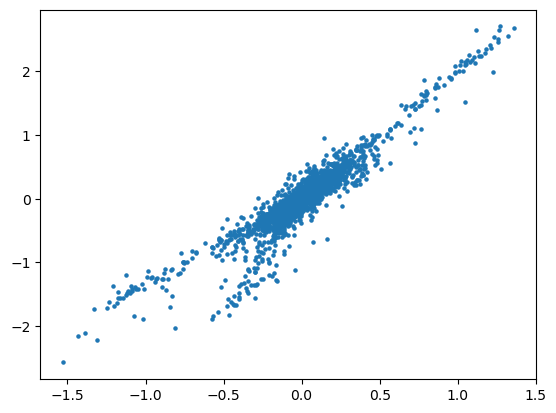

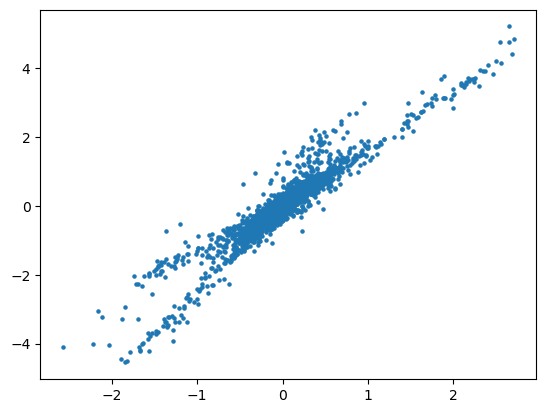

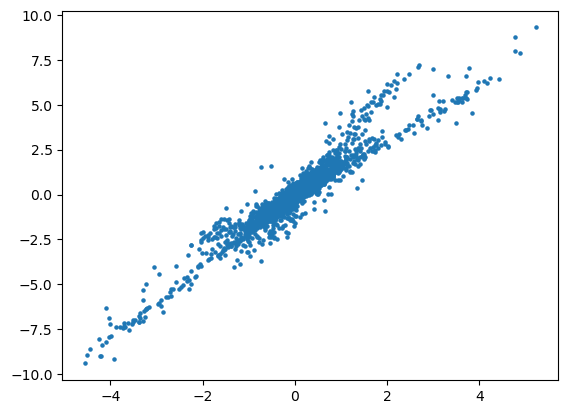

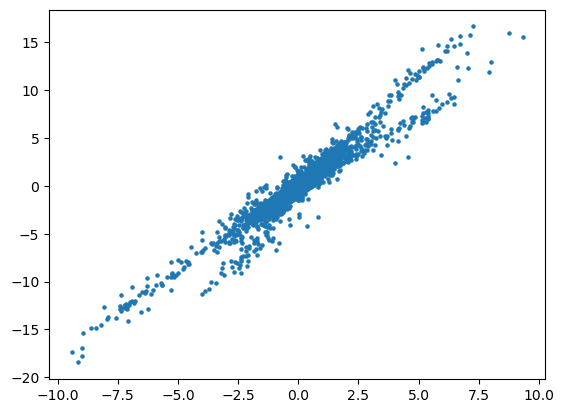

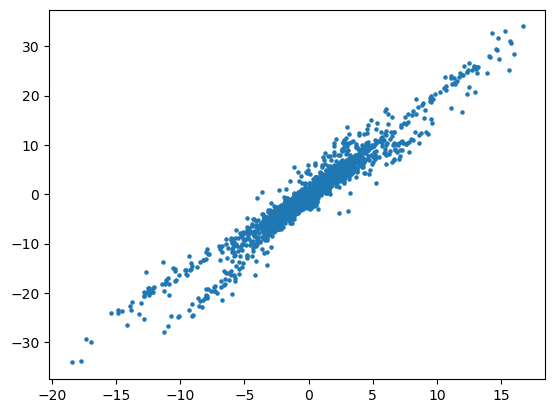

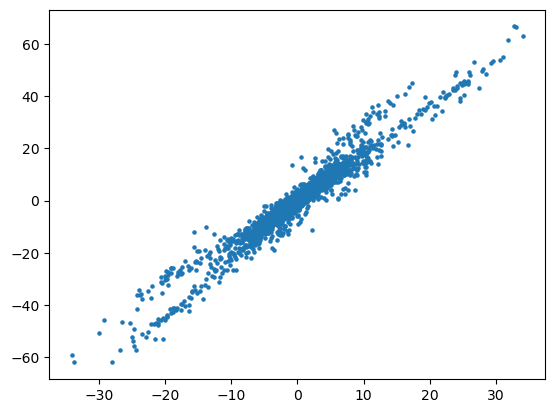

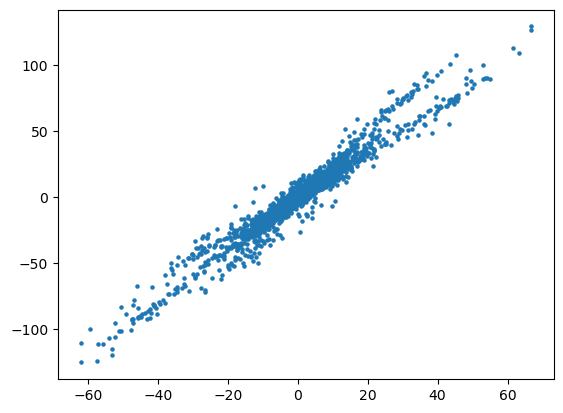

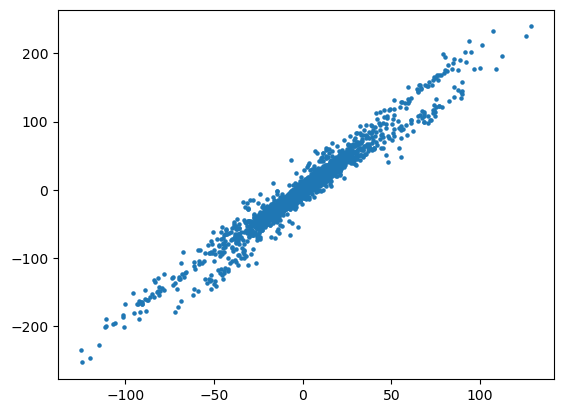

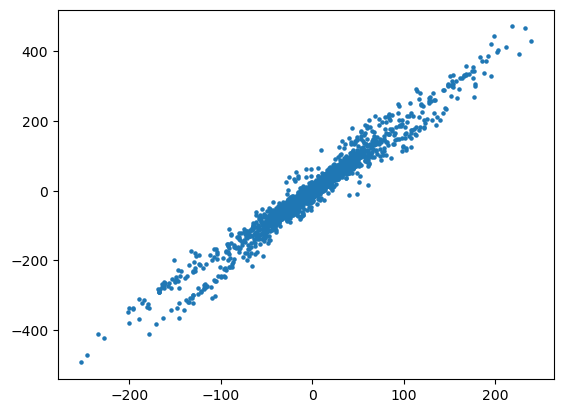

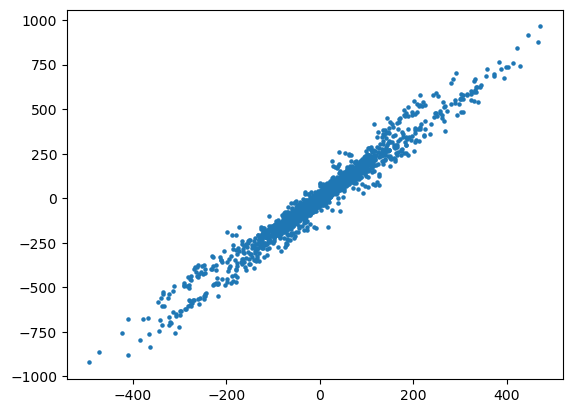

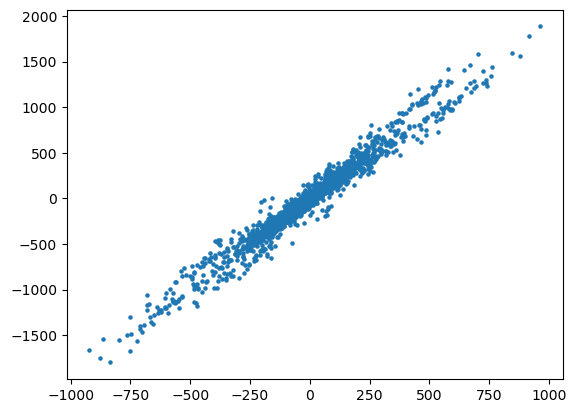

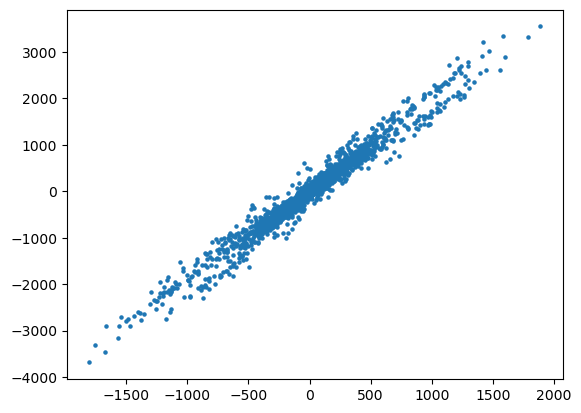

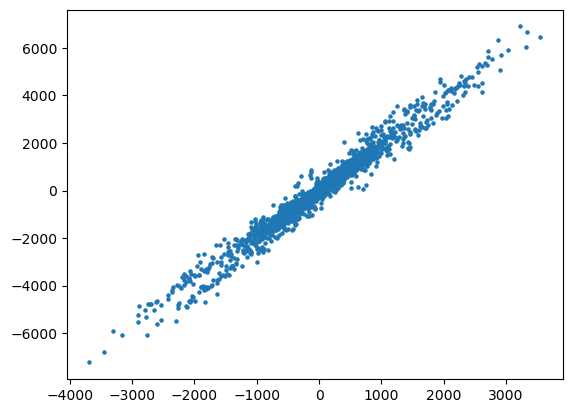

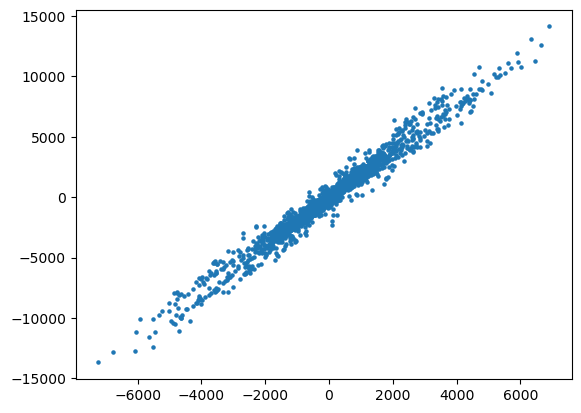

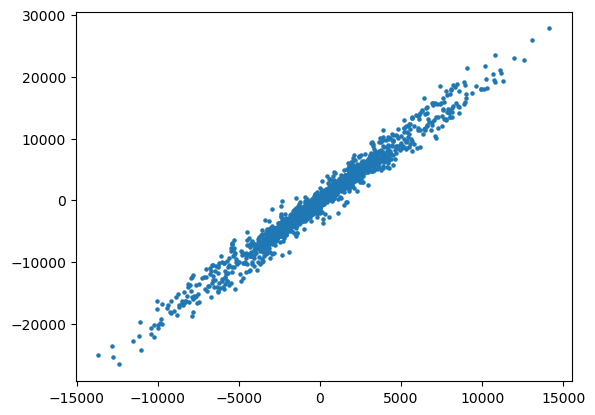

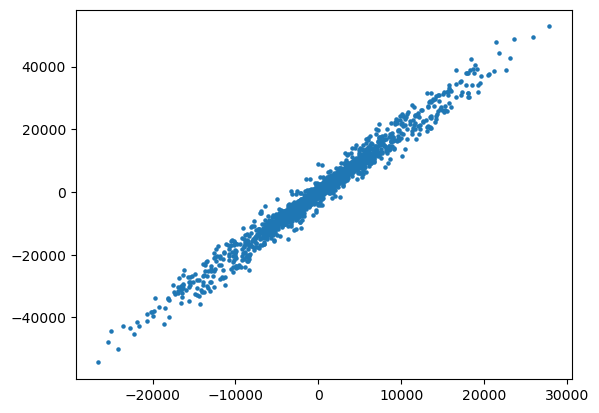

In [30]:
order = 100
for order in range(1, 20):
    plt.scatter(np.diff(oog.delta_phases, order - 1)[1::], np.diff(oog.delta_phases, order), s = 5)
    plt.show()

100%|██████████| 500/500 [00:00<00:00, 71975.56it/s]


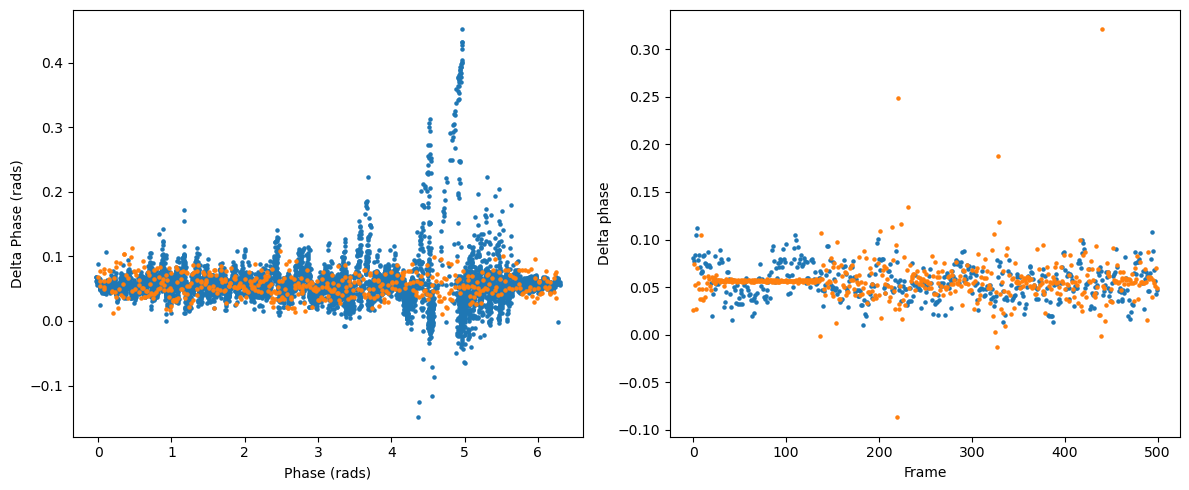

In [6]:
N = 500
k = 37
d = 10
T = 1e23
dt = 0.1
stationary_model_data_1 = hrv.brownian_motion_with_restoring_force(N, k, d, T, dt, restoring_force_model = lambda x: np.mean(oog.delta_phases), random_seed = 0, verbose = True)

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.scatter(oog.phases[1::], oog.delta_phases, s = 5)
plt.scatter(np.cumsum(stationary_model_data_1[0]) % (2 * np.pi), stationary_model_data_1[0], s = 5)
plt.xlabel("Phase (rads)")
plt.ylabel("Delta Phase (rads)")
plt.subplot(122)
plt.scatter(range(len(stationary_model_data_1[0])), stationary_model_data_1[0], s = 5)
plt.scatter(range(len(oog.delta_phases[0:N])), oog.delta_phases[0:N], s = 5)
plt.xlabel("Frame")
plt.ylabel("Delta phase")
plt.tight_layout()
plt.show()